<a href="https://colab.research.google.com/github/knoppin1/DATA-690-WANG/blob/master/Individual_Project/covid_daily_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## COVID-19 Daily Report
### Ken Noppinger

Source from Gitbhub for Johns Hopkins Resource Center: 

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-17-2020.csv

In [1]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-17-2020.csv

--2020-10-18 16:48:45--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-17-2020.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 554635 (542K) [text/plain]
Saving to: ‘10-17-2020.csv.9’

10-17-2020.csv.9    100%[===================>] 541.64K  --.-KB/s    in 0.08s   

2020-10-18 16:48:45 (6.92 MB/s) - ‘10-17-2020.csv.9’ saved [554635/554635]



In [2]:
# Issue with pandas profiling
# Upgrade both packages solve the problem

!pip install  pandas pandas_profiling --upgrade

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.1.3)
Requirement already up-to-date: pandas_profiling in /usr/local/lib/python3.6/dist-packages (2.9.0)


In [3]:
import pandas as pd
from pandas_profiling import ProfileReport

In [4]:
print("pandas version:\t", pd.__version__)

pandas version:	 1.1.3


## Read COVID-19 Daily Report

In [5]:
covid_df = pd.read_csv("10-17-2020.csv")
covid_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-10-18 04:24:25,33.93911,67.709953,40141,1488,33561,5092.0,Afghanistan,103.115106,3.706933
1,NaN,NaN,NaN,Albania,2020-10-18 04:24:25,41.15330,20.168300,16774,448,10001,6325.0,Albania,582.875808,2.670800
2,NaN,NaN,NaN,Algeria,2020-10-18 04:24:25,28.03390,1.659600,54203,1846,37971,14386.0,Algeria,123.607094,3.405716
3,NaN,NaN,NaN,Andorra,2020-10-18 04:24:25,42.50630,1.521800,3377,59,2057,1261.0,Andorra,4370.672361,1.747113
4,NaN,NaN,NaN,Angola,2020-10-18 04:24:25,-11.20270,17.873900,7462,241,3022,4199.0,Angola,22.704129,3.229697


In [6]:
covid_df.shape

(3957, 14)

### Cleanup Columns

In [7]:
covid_df.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')

Rename the following columns: Admin2 and Combined_Key

In [8]:
covid_df.rename(columns = {'Admin2':'County', 'Combined_Key':'Place'}, inplace = True)

Remove columns that irrelevant to the study

In [9]:
irrelevant_columns = ['Last_Update', 'Lat', 'Long_', 'Recovered', 'Active']
covid_df = covid_df.drop(irrelevant_columns, axis=1)
covid_df.head(3)

,FIPS,County,Province_State,Country_Region,Confirmed,Deaths,Place,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,40141,1488,Afghanistan,103.115106,3.706933
1,NaN,NaN,NaN,Albania,16774,448,Albania,582.875808,2.670800
2,NaN,NaN,NaN,Algeria,54203,1846,Algeria,123.607094,3.405716


Reorder columns

In [10]:
column_order = ['FIPS','County','Province_State','Country_Region','Place','Confirmed','Deaths','Incidence_Rate','Case-Fatality_Ratio'] 
covid_df = covid_df[column_order] 
covid_df.head(3) 

,FIPS,County,Province_State,Country_Region,Place,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,Afghanistan,40141,1488,103.115106,3.706933
1,NaN,NaN,NaN,Albania,Albania,16774,448,582.875808,2.670800
2,NaN,NaN,NaN,Algeria,Algeria,54203,1846,123.607094,3.405716


### Remove Irrelevant Data

Note: Only counties in the US are useful for the study.

Determine how much of the dataframe is useful for the study.

In [11]:
covid_df["Country_Region"].value_counts().head(10)

US          3271
Russia        83
Japan         49
India         37
Colombia      34
China         33
Mexico        32
Brazil        27
Ukraine       27
Peru          26
Name: Country_Region, dtype: int64

The non-US data is irrelvant since only US counties are being studied.

Only keep the records representing US data.

In [12]:
covid_us_df = covid_df[covid_df.Country_Region == "US"]
covid_us_df.shape

(3271, 9)

Check Data Types and Counts

In [13]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3260 non-null   float64
 1   County               3265 non-null   object 
 2   Province_State       3788 non-null   object 
 3   Country_Region       3957 non-null   object 
 4   Place                3957 non-null   object 
 5   Confirmed            3957 non-null   int64  
 6   Deaths               3957 non-null   int64  
 7   Incidence_Rate       3876 non-null   float64
 8   Case-Fatality_Ratio  3914 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 278.4+ KB


The Non-Null counts are not the same, so cleanup missing data before moving forward.

### Missing Data Cleanup

Visualize the dataframe to identify missing data

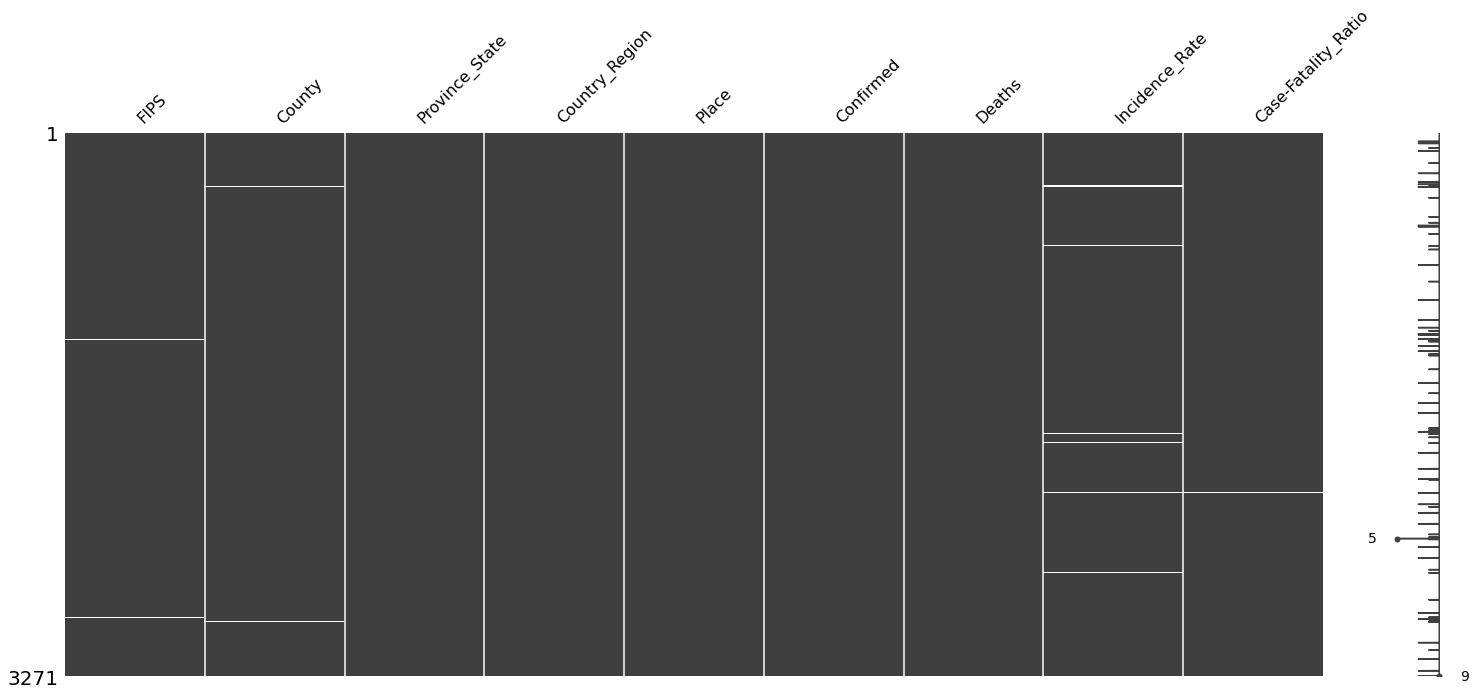

In [14]:
# Reference: https://analyticsindiamag.com/tutorial-on-missingno-python-tool-to-visualize-missing-values/
import missingno as msno
msno.matrix(covid_us_df)

Investigate records without a FIPS code

In [15]:
covid_nofips_us_df = covid_us_df[covid_us_df.FIPS.isna()]
covid_nofips_us_df.shape

(11, 9)

In [16]:
covid_nofips_us_df

,FIPS,County,Province_State,Country_Region,Place,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
1880,NaN,Dukes and Nantucket,Massachusetts,US,"Dukes and Nantucket, Massachusetts, US",204,2,710.034458,0.980392
1915,NaN,Federal Correctional Institution (FCI),Michigan,US,"Federal Correctional Institution (FCI), Michig...",195,5,NaN,2.564103
1947,NaN,Michigan Department of Corrections (MDOC),Michigan,US,"Michigan Department of Corrections (MDOC), Mic...",5846,75,NaN,1.282928
2200,NaN,Kansas City,Missouri,US,"Kansas City, Missouri, US",13499,162,2760.853515,1.200089
3074,NaN,NaN,Recovered,US,"Recovered, US",0,0,NaN,NaN
3547,NaN,Bear River,Utah,US,"Bear River, Utah, US",4436,14,2374.503527,0.315600
3548,NaN,Central Utah,Utah,US,"Central Utah, Utah, US",1038,6,1266.564170,0.578035
3552,NaN,Southeast Utah,Utah,US,"Southeast Utah, Utah, US",357,3,887.419523,0.840336
3553,NaN,Southwest Utah,Utah,US,"Southwest Utah, Utah, US",5252,45,2083.779688,0.856816
3556,NaN,TriCounty,Utah,US,"TriCounty, Utah, US",309,2,545.724277,0.647249


Records lacking a FIPS code cannot be used in the study because the field will be joined with land area data needed to determine population density for each county.

Remove the records without a FIPS code.

In [17]:
covid_us_df = covid_us_df[covid_us_df.FIPS.notna()]
covid_us_df.shape

(3260, 9)

Investigate records without a County

In [18]:
covid_no_county_us_df = covid_us_df[covid_us_df.County.isna()]
covid_no_county_us_df.shape

(5, 9)

In [19]:
covid_no_county_us_df

,FIPS,County,Province_State,Country_Region,Place,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
960,88888.0,NaN,Diamond Princess,US,"Diamond Princess, US",49,0,NaN,0.000000
1191,99999.0,NaN,Grand Princess,US,"Grand Princess, US",103,3,NaN,2.912621
1192,66.0,NaN,Guam,US,"Guam, US",3538,63,2154.308922,1.780667
2720,69.0,NaN,Northern Mariana Islands,US,"Northern Mariana Islands, US",86,2,155.955317,2.325581
3576,78.0,NaN,Virgin Islands,US,"Virgin Islands, US",1335,21,1244.546370,1.573034


These records represent provinces or special COVID groupings irrelevant to the study and can be removed.

In [20]:
covid_us_df = covid_us_df[covid_us_df.County.notna()]
covid_us_df.shape

(3255, 9)

In [21]:
covid_us_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255 entries, 633 to 3903
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3255 non-null   float64
 1   County               3255 non-null   object 
 2   Province_State       3255 non-null   object 
 3   Country_Region       3255 non-null   object 
 4   Place                3255 non-null   object 
 5   Confirmed            3255 non-null   int64  
 6   Deaths               3255 non-null   int64  
 7   Incidence_Rate       3193 non-null   float64
 8   Case-Fatality_Ratio  3220 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 254.3+ KB


There are still NaNs in the following filed not critical to the study: Lat, Long_, Active, Incidence_Rate, Case-Fatality_Ratio.

Set these NaNs to a value of zero.

In [22]:
covid_us_df = covid_us_df.fillna({'Lat':0, 'Long_':0, 'Active':0, 'Incidence_Rate':0, 'Case-Fatality_Ratio':0})
covid_us_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255 entries, 633 to 3903
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3255 non-null   float64
 1   County               3255 non-null   object 
 2   Province_State       3255 non-null   object 
 3   Country_Region       3255 non-null   object 
 4   Place                3255 non-null   object 
 5   Confirmed            3255 non-null   int64  
 6   Deaths               3255 non-null   int64  
 7   Incidence_Rate       3255 non-null   float64
 8   Case-Fatality_Ratio  3255 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 254.3+ KB


All NaNs addressed.  Check column statistics to identify any other missing data

In [23]:
covid_us_df.describe(include='all')

,FIPS,County,Province_State,Country_Region,Place,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
count,3255.000000,3255,3255,3255,3255,3255.000000,3255.000000,3255.000000,3255.000000
unique,NaN,1910,52,1,3255,NaN,NaN,NaN,NaN
top,NaN,Unassigned,Texas,US,"Spencer, Indiana, US",NaN,NaN,NaN,NaN
freq,NaN,51,255,3255,1,NaN,NaN,NaN,NaN
mean,32376.990476,NaN,NaN,NaN,NaN,2477.603379,67.235330,2282.013221,2.073816
std,17889.419665,NaN,NaN,NaN,NaN,9649.688318,329.042006,1581.940143,2.958482
min,1001.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,19056.000000,NaN,NaN,NaN,NaN,179.000000,2.000000,1192.244787,0.666667
50%,30069.000000,NaN,NaN,NaN,NaN,520.000000,8.000000,1982.596658,1.515450
75%,47036.000000,NaN,NaN,NaN,NaN,1513.000000,31.000000,3060.658905,2.752712


Note "Unassigned" is the most frequent value in the "admin2" column, which represents a county.  

This field should not be unassigned and needs to be investigated.

In [24]:
unassigned_df = covid_us_df[covid_us_df.County == "Unassigned"] 
unassigned_df.shape

(51, 9)

In [25]:
unassigned_df.sample(10)

,FIPS,County,Province_State,Country_Region,Place,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
3190,90046.0,Unassigned,South Dakota,US,"Unassigned, South Dakota, US",0,0,0.0,0.000000
2410,90031.0,Unassigned,Nebraska,US,"Unassigned, Nebraska, US",405,1,0.0,0.246914
2499,90035.0,Unassigned,New Mexico,US,"Unassigned, New Mexico, US",1532,0,0.0,0.000000
1639,90020.0,Unassigned,Kansas,US,"Unassigned, Kansas, US",0,0,0.0,0.000000
2558,90036.0,Unassigned,New York,US,"Unassigned, New York, US",0,22,0.0,0.000000
2465,90034.0,Unassigned,New Jersey,US,"Unassigned, New Jersey, US",368,0,0.0,0.000000
1973,90026.0,Unassigned,Michigan,US,"Unassigned, Michigan, US",10,0,0.0,0.000000
1024,90012.0,Unassigned,Florida,US,"Unassigned, Florida, US",1961,0,0.0,0.000000
3079,90044.0,Unassigned,Rhode Island,US,"Unassigned, Rhode Island, US",2945,23,0.0,0.780985
877,90006.0,Unassigned,California,US,"Unassigned, California, US",0,0,0.0,0.000000


Records with county field value of "Unassigned" represent states.

The study is looking at county-level population denisty, so state records are irrelevant and can be removed.

Remove the records with the county "Unassigned".

In [26]:
covid_counties_df = covid_us_df[covid_us_df.County != "Unassigned"]
covid_counties_df.shape

(3204, 9)

### Verify Data Types

In [27]:
covid_counties_df.dtypes

FIPS                   float64
County                  object
Province_State          object
Country_Region          object
Place                   object
Confirmed                int64
Deaths                   int64
Incidence_Rate         float64
Case-Fatality_Ratio    float64
dtype: object

FIPS code was read in as float because there were NaNs and that is a float type.

FIPS should be integer, so recast the column from float64 to int

In [29]:
covid_counties_df.FIPS = pd.to_numeric(covid_counties_df.FIPS).astype(int)
covid_counties_df.FIPS.dtypes

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


dtype('int64')

In [ ]:
covid_counties_df.sample(5)

In [ ]:
covid_counties_df.Province_State.unique()

In [ ]:
# of  Provinces/States in study
num_provinces_states = len(covid_counties_df.Province_State.unique())
num_provinces_states

In [ ]:
# Reference: https://analyticsindiamag.com/tutorial-on-missingno-python-tool-to-visualize-missing-values/
import missingno as msno
msno.matrix(covid_counties_df)

## Pandas Profile Report

In [ ]:
type(covid_counties_df)

In [ ]:
prof = ProfileReport(covid_counties_df, minimal=True)
prof.to_file(output_file="covid19_daily_report.html")
prof

## Read Population Data

In [ ]:
!wget https://www.ers.usda.gov/webdocs/DataFiles/48747/PopulationEstimates.xls

In [ ]:
pop_df = pd.read_excel("PopulationEstimates.xls")
pop_df.head()

Reread the excel file skipping the first two lines.

In [ ]:
columns_of_interest = ['FIPStxt','State','Area_Name','POP_ESTIMATE_2019']
pop_df = pd.read_excel("PopulationEstimates.xls", usecols=columns_of_interest, skiprows=2)
pop_df.head()

In [ ]:
msno.matrix(pop_df)

In [ ]:
pop_df.info()

## Merge datasets

In [ ]:
county_df = covid_counties_df.merge(pop_df, how="inner", left_on='FIPS', right_on='FIPStxt').drop(['FIPStxt', 'Area_Name'], axis=1)
county_df

In [ ]:
msno.matrix(county_df)

In [ ]:
prof = ProfileReport(county_df, minimal=True)
prof.to_file(output_file="counties.html")
prof

In [ ]:
county_df.sample(20)

In [ ]:
county_df = county_df.sort_values(by='POP_ESTIMATE_2019', ascending=False)
county_df.head(10)

In [ ]:
ny_df = county_df[county_df.State=='NY']
ny_df.head(10)

---
## Read Land Area Data

In [ ]:
!wget https://www2.census.gov/library/publications/2011/compendia/usa-counties/excel/LND01.xls

In [ ]:
# STCOU - FIPS code for state or county
# Areaname - County and State
# LND110210D - Land area in square miles, 2010 SQM
columns_of_interest = ['Areaname','STCOU','LND110210D']
land_area_df = pd.read_excel("LND01.xls", usecols=columns_of_interest, skiprows=0)
land_area_df.head()

In [ ]:
land_area_df[land_area_df.Areaname == 'Howard, MD']

In [ ]:
land_area_df.shape

---
## Merge with county data

In [ ]:
county_df = county_df.merge(land_area_df, how="inner", left_on='FIPS', right_on='STCOU').drop(['STCOU', 'Areaname'], axis=1)
county_df

In [ ]:
county_df.rename(columns = {'POP_ESTIMATE_2019':'Population_2019', 'LND110210D':'Land_Area','Combined_Key':'Place'}, inplace = True)

In [ ]:
def ratio(x, y):
    return int(x / y)

In [ ]:
# pop_square_mile test
ratio(10039107, 4057.88)

In [ ]:
# pop_square_mile test
ratio(169, 668.93) 

In [ ]:
county_df["Pop_Sq_Mile"] = county_df[["Population_2019", "Land_Area"]].apply(lambda x: ratio(*x), axis=1)
county_df["Confirmed_Sq_Mile"] = county_df[["Confirmed", "Land_Area"]].apply(lambda x: ratio(*x), axis=1)
county_df["Deaths_Sq_Mile"] = county_df[["Deaths", "Land_Area"]].apply(lambda x: ratio(*x), axis=1)
county_df.head(10)

# Reorder columns


In [ ]:
column_order = ['FIPS','County','Province_State','State','Place','Population_2019','Land_Area','Pop_Sq_Mile', 'Confirmed','Confirmed_Sq_Mile','Deaths','Deaths_Sq_Mile','Incidence_Rate','Case-Fatality_Ratio'] 
county_df = county_df[column_order] 
county_df.head() 

In [ ]:
most_densely_populated_df = county_df.sort_values(by='Pop_Sq_Mile',ascending=False).head(15) 
most_densely_populated_df

In [ ]:
highest_case_rate_by_density_df = county_df.sort_values(by='Confirmed_Sq_Mile',ascending=False).head(15)
highest_case_rate_by_density_df

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Create plot
fig = plt.figure(figsize=(14,6))
#ax = plt.gca()
plt.scatter(county_df.Pop_Sq_Mile, county_df.Confirmed_Sq_Mile , alpha=0.3, c="blue", edgecolors='none')
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.xlabel('Population Per Square Mile',fontsize=16)
plt.ylabel('Confirmed COVID-19 Cases Per Square Mile',fontsize=16)
plt.title('Confirmed Cases Per Square Mile vs. Population Per Square Mile',fontsize=18)
plt.suptitle('US Counties',fontsize=20)
#plt.legend(loc=2)#
plt.show()

In [ ]:

county_df.hist(figsize=(14,10))

In [ ]:
county_df['Land_Area'].hist()